# Fractal Dimension

This notebook covers fractal dimension measures, including:
- Higuchi Fractal Dimension
- Petrosian Fractal Dimension
- Katz Fractal Dimension

In [1]:
# Setup notebook state
from nbutils import setup_notebook; setup_notebook()

In [2]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.aperiodic.conversions import convert_exponent_hfd
from neurodsp.utils import set_random_seed

In [3]:
# Import custom project code
from apm.io import APMDB
from apm.run import run_sims, run_sims_load
from apm.methods import higuchi_fd, petrosian_fd, katz_fd
from apm.methods.settings import HFD_PARAMS, KFD_PARAMS, PFD_PARAMS
from apm.plts.sims import plot_ap_sims, plot_pe_sims, plot_sims_two
from apm.plts.settings import COLORS
from apm.plts.utils import figsaver
from apm.sim.examples import get_examples, check_examples
from apm.sim.settings import N_SIMS
from apm.sim.defs import SIM_ITERS

## Settings

In [4]:
# Get current sampling rate
fs = SIM_ITERS.fs

In [5]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '23_fractaldim'

# Create helper function to manage figsaver settings
fsaver = figsaver(SAVE_FIG, FIGPATH)

In [6]:
# Set the random seed
set_random_seed(111)

In [7]:
# Define collection of example signals
examples = get_examples()

## Fractal Dimension Measures

Fractal dimension measures are measures of the roughness, or complexity, of a shape.

In [8]:
# Check Fractal Dimension measure parameters
print(HFD_PARAMS)
print(KFD_PARAMS)
print(PFD_PARAMS)

{}
{}
{}


### Calculate Fractal Dimension on Example Signals

Calculate measures of fractal dimension on time series. 

In [9]:
# Define expected values for Higuchi fractal dimension estimation
hfd_expected = {}
hfd_expected['powerlaw'] = convert_exponent_hfd(SIM_ITERS.params['ap']['exponent'])

In [10]:
# Check Higuchi fractal dimension measures on example signals
check_examples(examples, higuchi_fd, HFD_PARAMS, 'Higuchi fractal dimension', hfd_expected)

Computed Higuchi fractal dimension:
  powerlaw       : 	 1.8008 	2.00
  synaptic       : 	 1.7769
  knee           : 	 1.6524
  oscillation    : 	 1.1116
  burst          : 	 1.1105
  combined       : 	 1.6150
  comb_burst     : 	 1.7103
  comb_peak      : 	 1.6229


In [11]:
# Check Katz fractal dimension measures on example signals
check_examples(examples, katz_fd, KFD_PARAMS, 'Katz fractal dimension')

Computed Katz fractal dimension:
  powerlaw       : 	 4.5050
  synaptic       : 	 4.2275
  knee           : 	 4.2499
  oscillation    : 	 4.8686
  burst          : 	 3.5142
  combined       : 	 4.3752
  comb_burst     : 	 4.6734
  comb_peak      : 	 4.2328


In [12]:
# Check Petrosian fractal dimension measures on example signals
check_examples(examples, petrosian_fd, PFD_PARAMS, 'Petrosian fractal dimension')

Computed Petrosian fractal dimension:
  powerlaw       : 	 1.0243
  synaptic       : 	 1.0232
  knee           : 	 1.0203
  oscillation    : 	 1.0035
  burst          : 	 1.0021
  combined       : 	 1.0233
  comb_burst     : 	 1.0235
  comb_peak      : 	 1.0235


### Fractal Dimension: Aperiodic Variations

In [13]:
# Calculate the expected Higuchi fractal dimension value for each powerlaw exponent
exps_for_expected = [val for val in SIM_ITERS._iters['ap_exp']['values'] if val != -0.5]
expected_hfd = [convert_exponent_hfd(exp) for exp in exps_for_expected]
expected_hfd.insert(5, None)

In [14]:
# Run simulations calculating fractal dimension across exponents
hfd_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], higuchi_fd, HFD_PARAMS, N_SIMS)
kfd_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], katz_fd, KFD_PARAMS, N_SIMS)
pfd_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], petrosian_fd, PFD_PARAMS, N_SIMS)

In [15]:
# Run simulations calculating fractal dimension across exponents with an oscillation
hfd_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], higuchi_fd, HFD_PARAMS, N_SIMS)
kfd_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], katz_fd, KFD_PARAMS, N_SIMS)
pfd_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], petrosian_fd, PFD_PARAMS, N_SIMS)

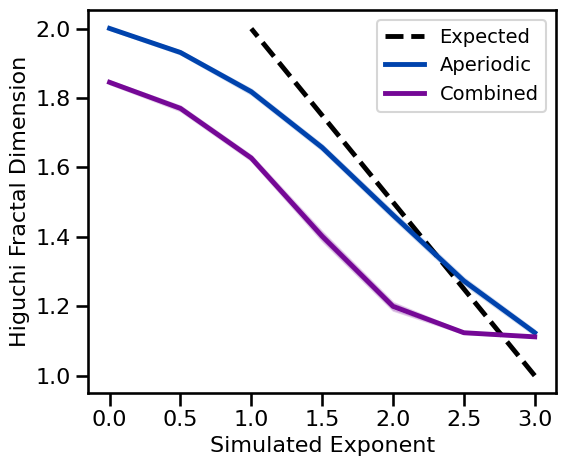

In [16]:
# Plot Higuchi fractal dimension estimates across aperiodic variations
plot_ap_sims(hfd_sims_exp, hfd_sims_comb, 'Higuchi Fractal Dimension',
             expected=expected_hfd, **fsaver('hfd_ap'))

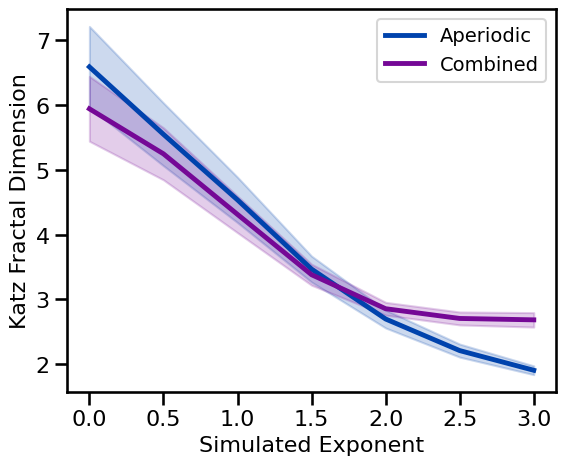

In [17]:
# Plot Katz fractal dimension estimates across aperiodic variations
plot_ap_sims(kfd_sims_exp, kfd_sims_comb, 'Katz Fractal Dimension', **fsaver('kfd_ap'))

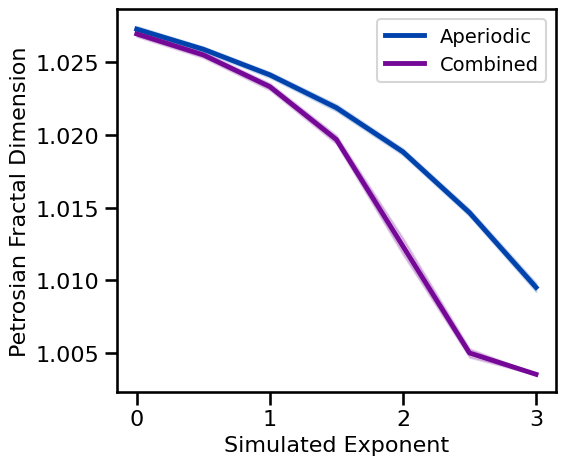

In [18]:
# Plot Petrosian fractal dimension estimates across aperiodic variations
plot_ap_sims(pfd_sims_exp, pfd_sims_comb, 'Petrosian Fractal Dimension', **fsaver('pfd_ap'))

### Fractal Dimension: Periodic Variations

In [19]:
# Run simulations calculating fractal dimension across oscillation frequency
hfd_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], higuchi_fd, HFD_PARAMS, N_SIMS)
kfd_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], katz_fd, KFD_PARAMS, N_SIMS)
pfd_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], petrosian_fd, PFD_PARAMS, N_SIMS)

In [20]:
# Run simulations calculating fractal dimension across oscillation power
hfd_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], higuchi_fd, HFD_PARAMS, N_SIMS)
kfd_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], katz_fd, KFD_PARAMS, N_SIMS)
pfd_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], petrosian_fd, PFD_PARAMS, N_SIMS)

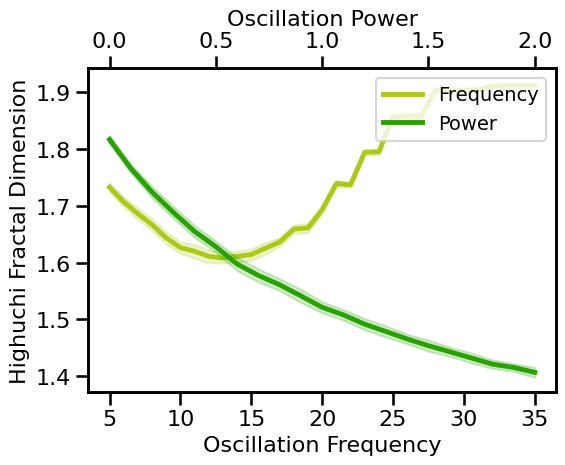

In [21]:
# Plot Higuchi fractal dimension estimates across periodic variations
plot_pe_sims(hfd_sims_freq, hfd_sims_pow, 'Highuchi Fractal Dimension', **fsaver('hfd_pe'))

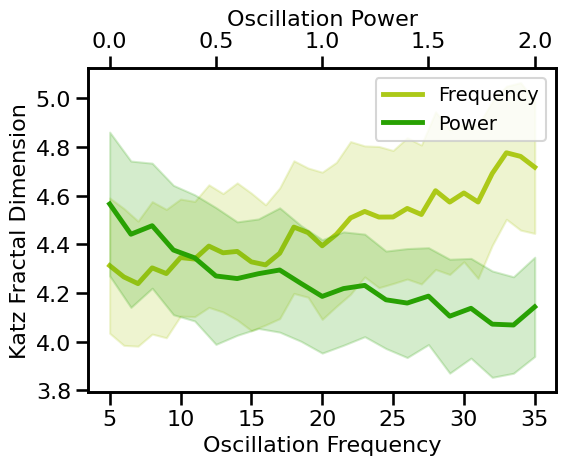

In [22]:
# Plot Katz fractal dimension estimates across periodic variations
plot_pe_sims(kfd_sims_freq, kfd_sims_pow, 'Katz Fractal Dimension', **fsaver('kfd_pe'))

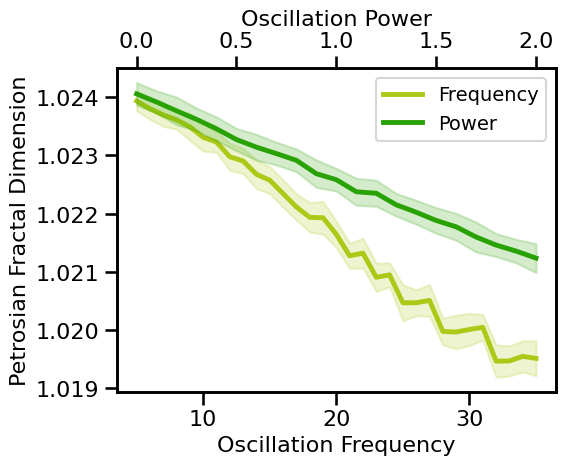

In [23]:
# Plot Petrosian fractal dimension estimates across periodic variations
plot_pe_sims(pfd_sims_freq, pfd_sims_pow, 'Petrosian Fractal Dimension', **fsaver('pfd_pe'))

### Fractal Dimension: Knee Variations

In [24]:
# Run simulations calculating fractal dimension across timescales
hfd_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                            higuchi_fd, HFD_PARAMS, N_SIMS)
kfd_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                            katz_fd, KFD_PARAMS, N_SIMS)
pfd_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                            petrosian_fd, PFD_PARAMS, N_SIMS)

In [25]:
# Run simulations calculating fractal dimension across knee values (sims from file)
hfd_sims_knee = run_sims_load('ap-knee-' + str(fs), higuchi_fd, HFD_PARAMS)
kfd_sims_knee = run_sims_load('ap-knee-' + str(fs), katz_fd, KFD_PARAMS)
pfd_sims_knee = run_sims_load('ap-knee-' + str(fs), petrosian_fd, PFD_PARAMS)

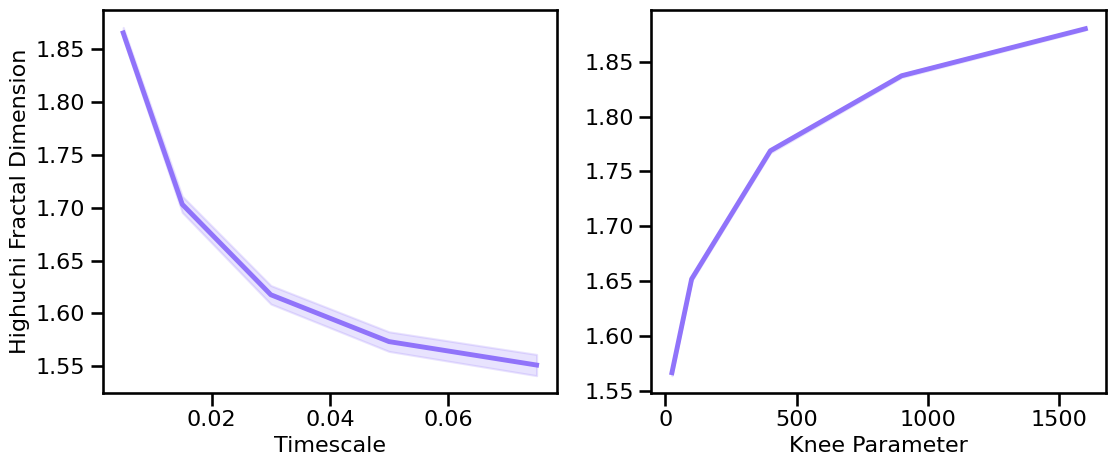

In [26]:
# Plot the estimated Higuchi fractal dimension across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, hfd_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, hfd_sims_knee, 'Knee Parameter',
              ylabel='Highuchi Fractal Dimension', color=COLORS['KN'], **fsaver('hfd_kn_vars'))

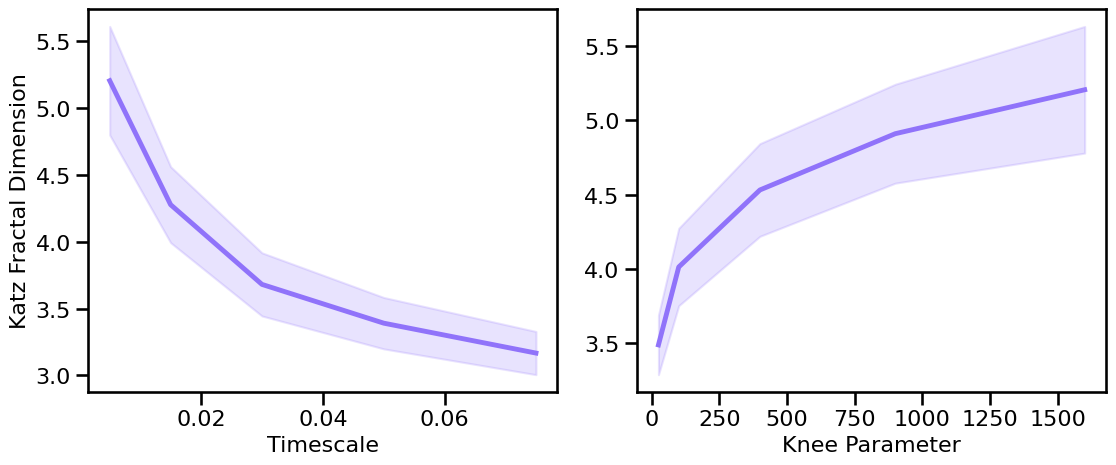

In [27]:
# Plot the estimated Katz fractal dimension across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, kfd_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, kfd_sims_knee, 'Knee Parameter',
              ylabel='Katz Fractal Dimension', color=COLORS['KN'], **fsaver('kfd_kn_vars'))

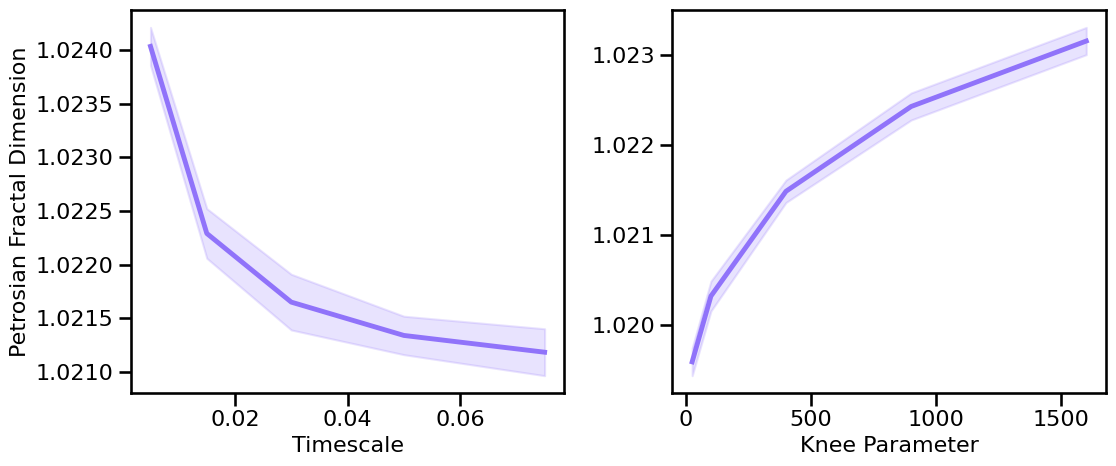

In [28]:
# Plot the estimated Petrosian fractal dimension across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, pfd_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, pfd_sims_knee, 'Knee Parameter',
              ylabel='Petrosian Fractal Dimension', color=COLORS['KN'], **fsaver('pfd_kn_vars'))

### Fractal Dimension: Periodic Variations

In [29]:
# Run simulations calculating fractal dimension across peak bandwidths (sims from file)
hfd_sims_bw = run_sims_load('comb-bw-' + str(fs), higuchi_fd, HFD_PARAMS)
kfd_sims_bw = run_sims_load('comb-bw-' + str(fs), katz_fd, KFD_PARAMS)
pfd_sims_bw = run_sims_load('comb-bw-' + str(fs), petrosian_fd, PFD_PARAMS)

In [30]:
# Run simulations calculating fractal dimension across burst probabilities
hfd_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], higuchi_fd, HFD_PARAMS, N_SIMS)
kfd_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], katz_fd, KFD_PARAMS, N_SIMS)
pfd_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], petrosian_fd, PFD_PARAMS, N_SIMS)

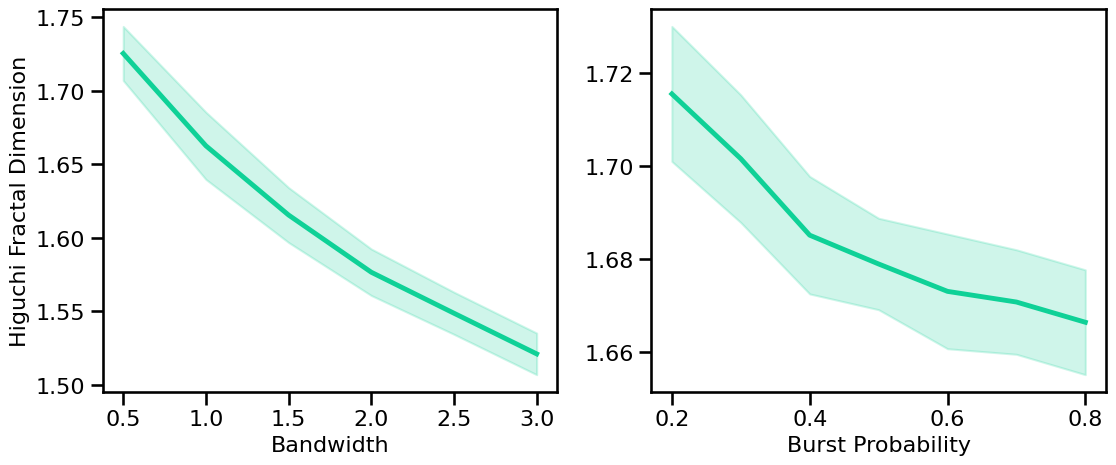

In [31]:
# Plot the estimated Higuchi fractal dimension across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, hfd_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, hfd_sims_burst, 'Burst Probability',
              ylabel='Higuchi Fractal Dimension', color=COLORS['BW'], **fsaver('hfd_pe_vars'))

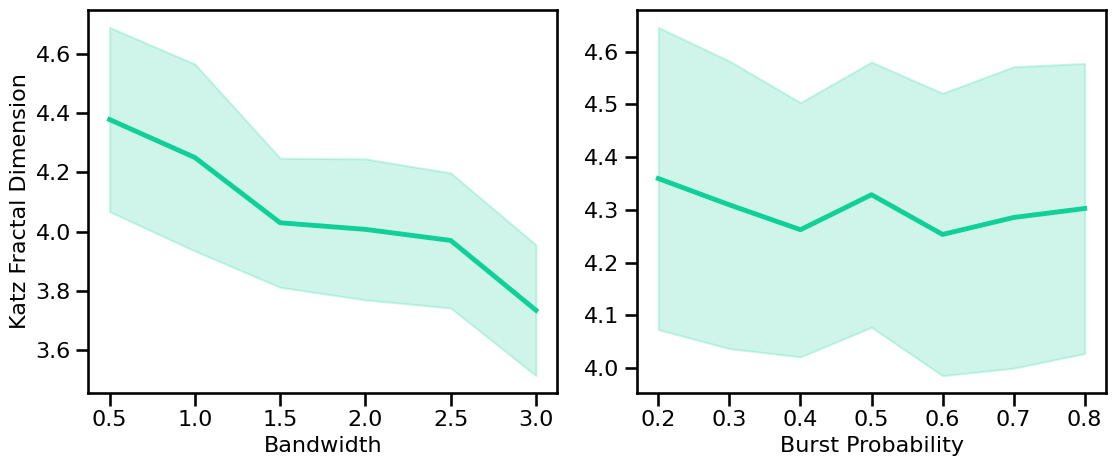

In [32]:
# Plot the estimated Katz fractal dimension across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, kfd_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, kfd_sims_burst, 'Burst Probability',
              ylabel='Katz Fractal Dimension', color=COLORS['BW'], **fsaver('kfd_pe_vars'))

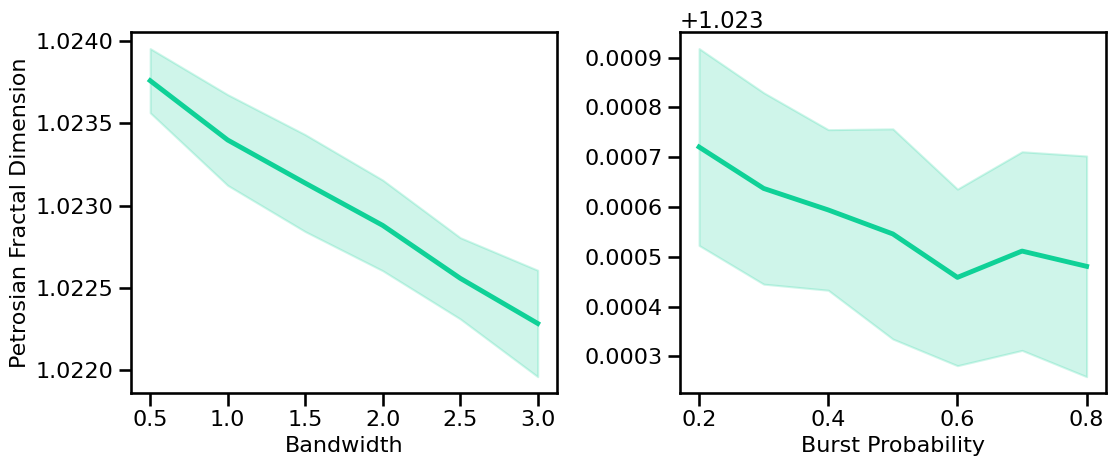

In [33]:
# Plot the estimated Petrosian fractal dimension across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, pfd_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, pfd_sims_burst, 'Burst Probability',
              ylabel='Petrosian Fractal Dimension', color=COLORS['BW'], **fsaver('pfd_pe_vars'))

## Conclusions

Overall, we can see the following patterns in these simulations:

Fractal dimension measures (general patterns, across all measures):
- increase with decreasing aperiodic exponent, non-linearly
- decreases with increasing oscillations frequency or power, mixed patterns